<a href="https://colab.research.google.com/github/atalaydenknalbant/IBB_Education_Aid/blob/main/IBB_Education_Aid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Istanbul Metropolitan Municipality(IBB) Education Aid Data](https://data.ibb.gov.tr/dataset/genc-universiteli-egitim-yardimi-veri-seti/resource/69484e6b-3440-4a61-bf59-19e5fafd49a9)

### Import Libraries


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import urllib 
import json 
import seaborn as sns
from google.colab import data_table
data_table.enable_dataframe_formatter()

### Define Function to obtain dataset as dataframe

In [6]:
def IbbToDataframe(url): 
  query = urllib.request.urlopen(url)
  data = json.loads(query.read().decode())
  data = data.get("value")
  return pd.DataFrame(data)

### Obtain and load first dataframe

In [7]:
df = IbbToDataframe('https://data.ibb.gov.tr/datastore/odata3.0/69484e6b-3440-4a61-bf59-19e5fafd49a9?$top=99999&$format=json')
df = df.drop(columns='_id')
df.head()

,ASSISTANCE_YEAR,ASSISTANCE_TERM,UNIVERSITY,AGE,COUNTY,NUMBER_OF_STUDENTS
0,2019,2,Sağlık Bilimleri Üniversitesi,20,ATAŞEHİR,4
1,2019,2,Marmara Üniversitesi,19,BEYKOZ,2
2,2020,1,Sivas Cumhuriyet Üniversitesi,21,KARTAL,1
3,2020,1,Nişantaşı Üniversitesi,23,BEYLİKDÜZÜ,3
4,2020,1,Kastamonu Üniversitesi,24,BEYOĞLU,1


### Check if there is any NaN value

In [8]:
df.isna().sum()

ASSISTANCE_YEAR       0
ASSISTANCE_TERM       0
UNIVERSITY            0
AGE                   0
COUNTY                0
NUMBER_OF_STUDENTS    0
dtype: int64

### Count total data

In [9]:
print("Total Number of Data: " + str(len(df.index)))

Total Number of Data: 27751


### Count total Students

In [10]:
print("Total Number of Students: " + str(df["NUMBER_OF_STUDENTS"].sum(axis=0)))

Total Number of Students: 63077


### Count total Universities

In [11]:
print("Total Number of Universities: " + str(df["UNIVERSITY"].nunique()))

Total Number of Universities: 208


### Descriptive Statistics 

In [12]:
desc = df.describe()
desc

,ASSISTANCE_YEAR,ASSISTANCE_TERM,AGE,NUMBER_OF_STUDENTS
count,27751.000000,27751.000000,27751.000000,27751.000000
mean,2019.451912,1.282116,21.656841,2.272963
std,0.497691,0.450038,1.810172,3.034453
min,2019.000000,1.000000,17.000000,1.000000
25%,2019.000000,1.000000,20.000000,1.000000
50%,2019.000000,1.000000,22.000000,1.000000
75%,2020.000000,2.000000,23.000000,2.000000
max,2020.000000,2.000000,27.000000,78.000000


## Visualization


### Correlation Map

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


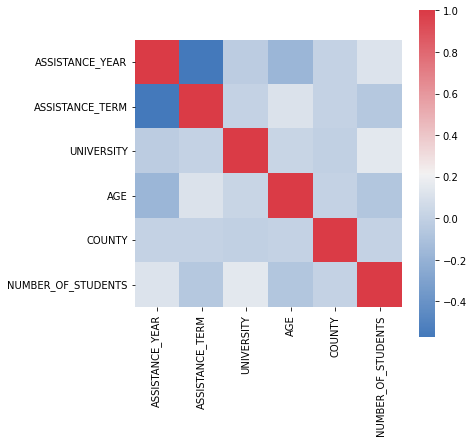

In [13]:
df_corr = df.copy()
df_corr['UNIVERSITY']= df_corr['UNIVERSITY'].astype('category').cat.codes
df_corr['COUNTY']= df_corr['COUNTY'].astype('category').cat.codes
f, ax = plt.subplots(figsize=(6, 6))
corr = df_corr.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(250, 10, as_cmap=True),
            square=True, ax=ax)

### Universities with most IBB scholarships

In [14]:
color_list = ['yellowgreen','yellow','wheat','violet','turquoise','tomato','steelblue','springgreen', 'red', "peru", 'black','powderblue' ,'olive', 'limegreen','indigo', 'darkorange','chocolate','aqua']

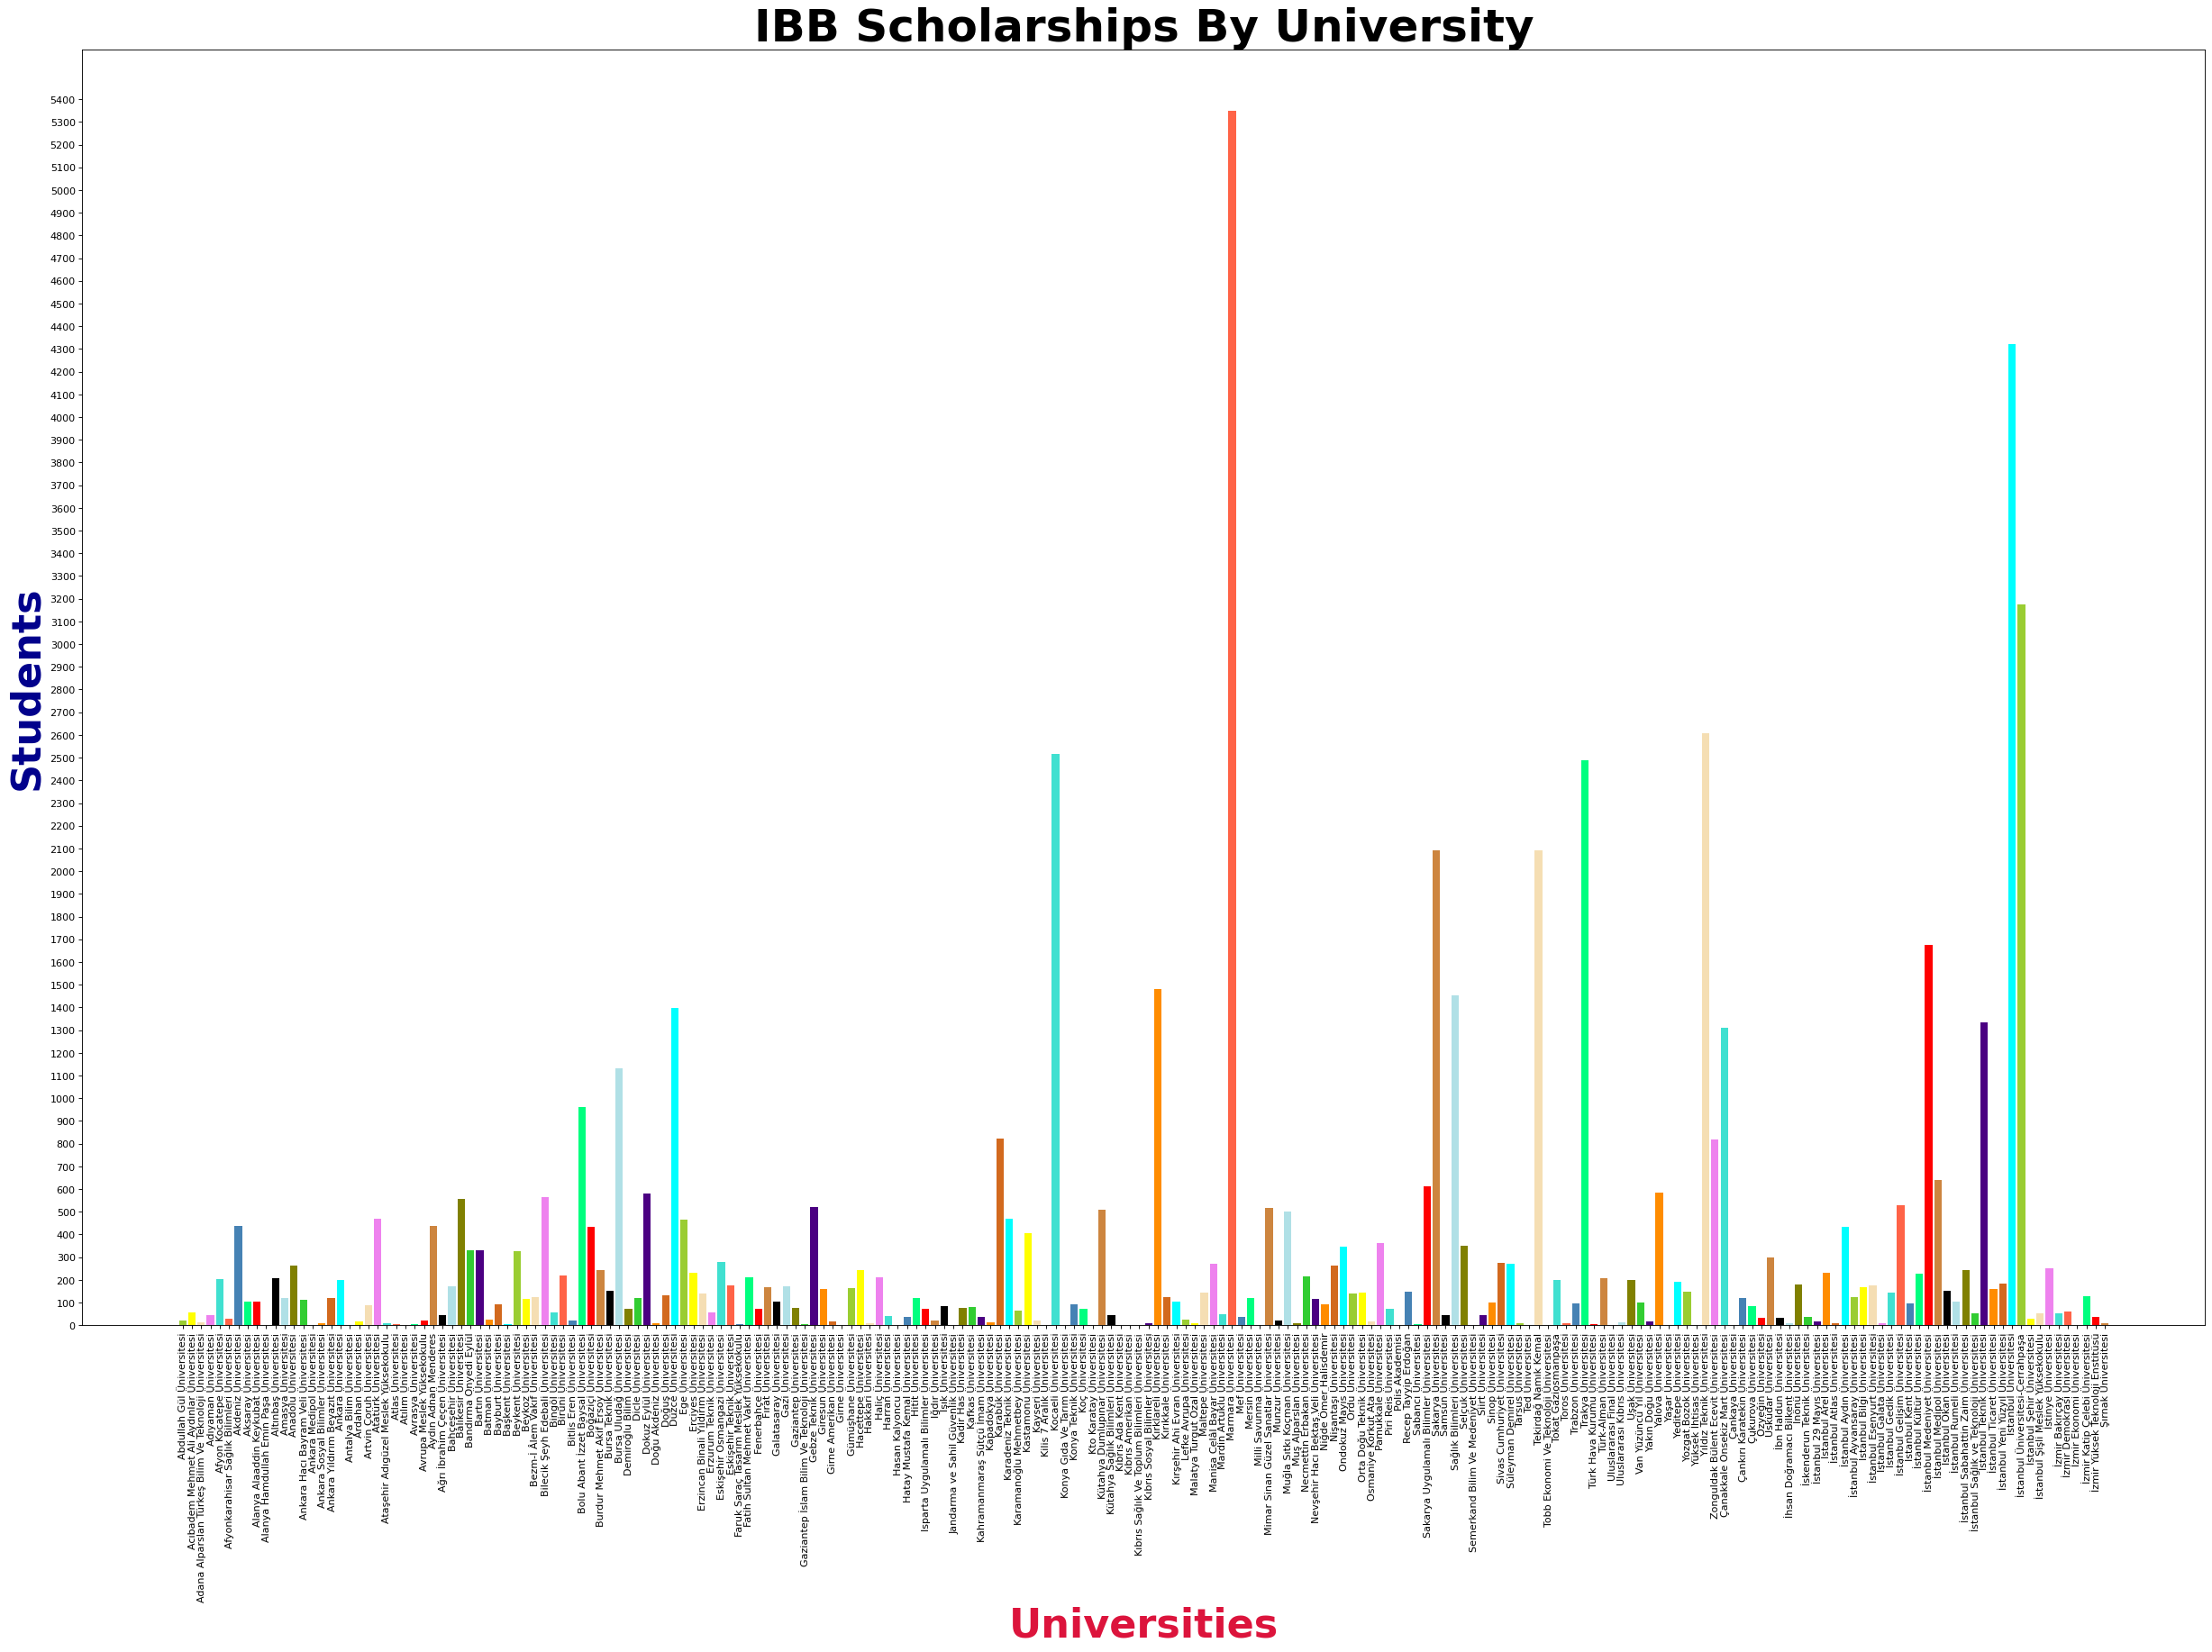

In [21]:
df2 = df.drop(columns=['ASSISTANCE_YEAR', 'ASSISTANCE_TERM', 'AGE', 'COUNTY'])
df2 = df2.groupby(['UNIVERSITY']).agg({'NUMBER_OF_STUDENTS': 'sum'})
y_pos = np.arange(len(df2))
plt.figure(num=None, figsize=(38,30), dpi=80, facecolor='w', edgecolor='k')
plt.bar(y_pos, df2['NUMBER_OF_STUDENTS'].to_numpy(), color=color_list)
plt.xticks(y_pos, list(df2.index), rotation=90)
plt.yticks(np.arange(0, 5500, 100)) 
plt.xlabel('Universities', fontweight='bold', color = 'crimson', fontsize='40')
plt.ylabel('Students', fontweight='bold', color = 'darkblue', fontsize='40')
plt.title('IBB Scholarships By University', fontweight='bold', color = 'black', fontsize='45')
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.show()





### Top 10 universities with most IBB scholarships


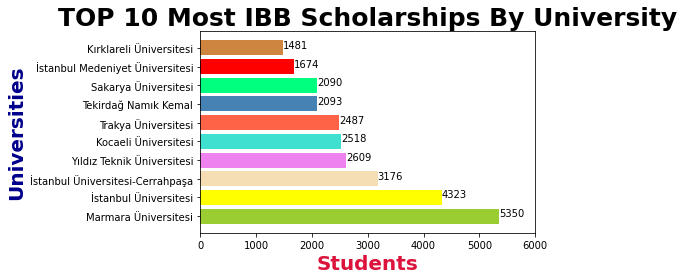

In [22]:
df3 = df2.nlargest(10, ['NUMBER_OF_STUDENTS'])
y_pos = np.arange(len(df3))
plt.barh(list(df3.index), df3['NUMBER_OF_STUDENTS'].to_numpy(), color = color_list)
plt.xticks(np.arange(0, 7000, 1000)) 
plt.xlabel('Students', fontweight='bold', color = 'crimson', fontsize='20')
plt.ylabel('Universities', fontweight='bold', color = 'darkblue', fontsize='20')
plt.title('TOP 10 Most IBB Scholarships By University', fontweight='bold', color = 'black', fontsize='25')
for index, value in enumerate(df3['NUMBER_OF_STUDENTS'].to_numpy()):
    plt.text(value, index, str(value))
plt.subplots_adjust(bottom=0.5, top=1.2)
plt.show()

### Counties with most IBB scholarships


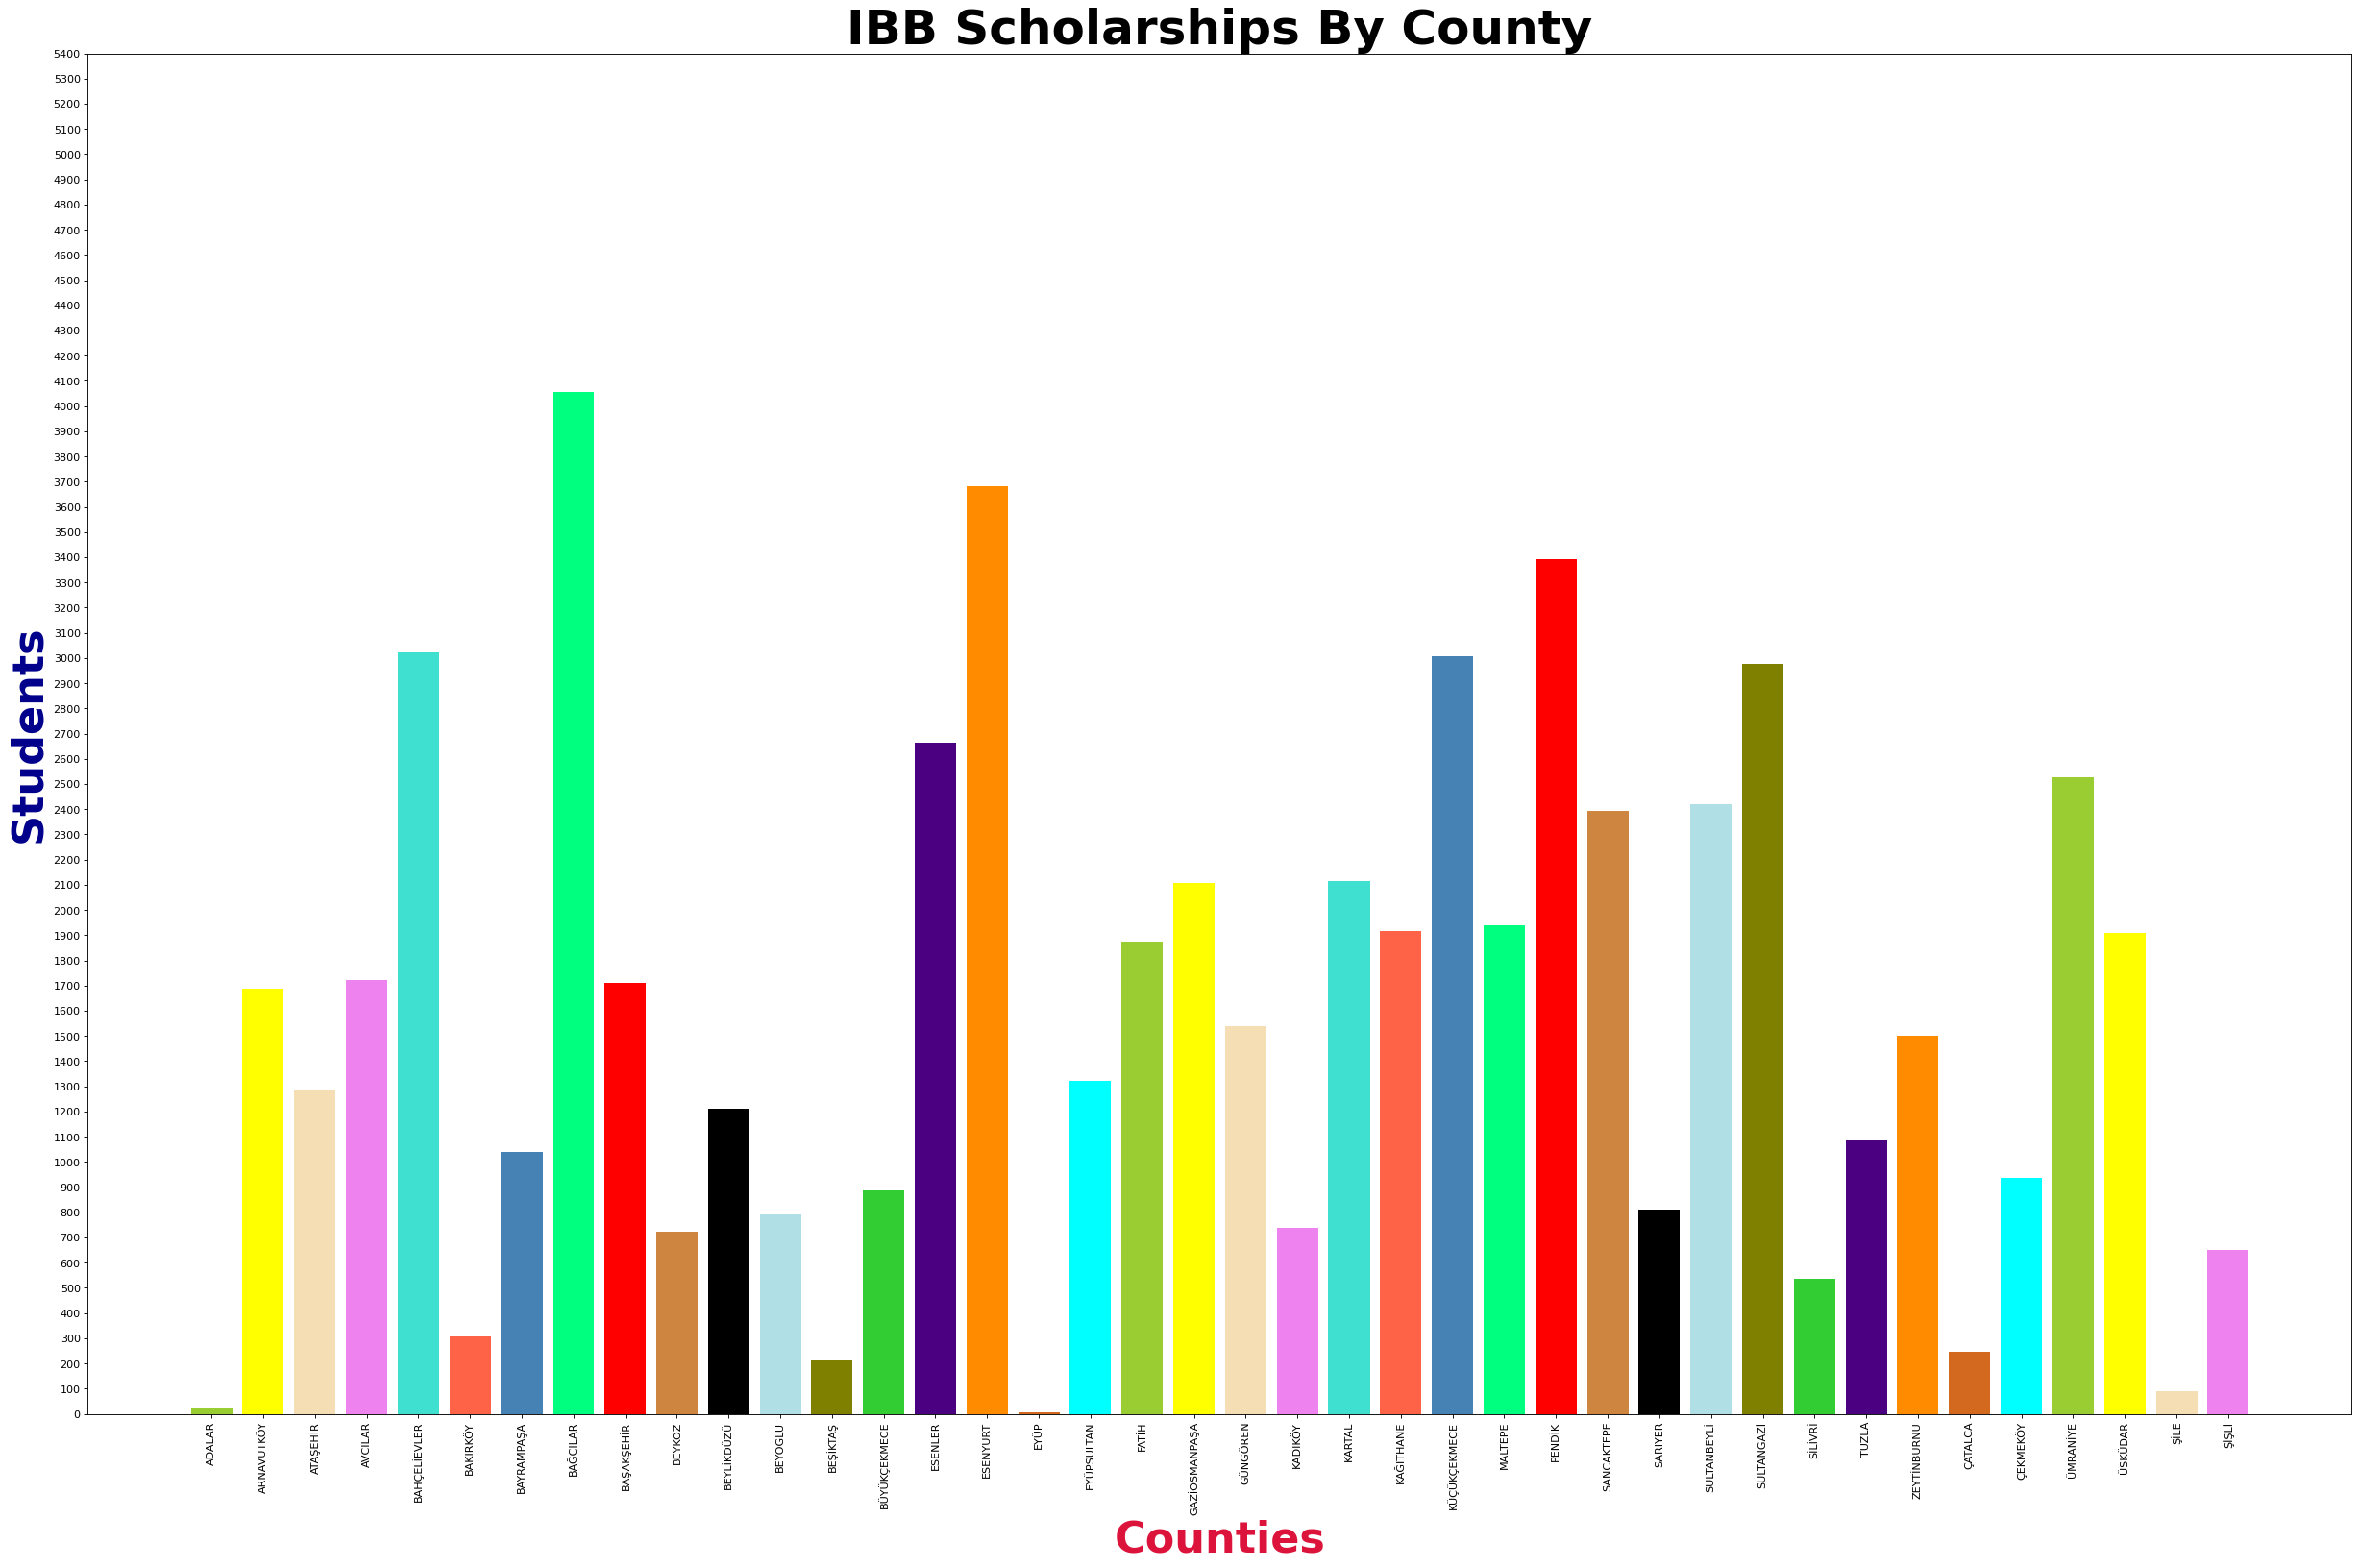

In [23]:
df4 = df.drop(columns=['ASSISTANCE_YEAR', 'ASSISTANCE_TERM', 'AGE', 'UNIVERSITY'])
df4 = df4.groupby(['COUNTY']).agg({'NUMBER_OF_STUDENTS': 'sum'})
y_pos = np.arange(len(df4))
plt.figure(num=None, figsize=(38,30), dpi=80, facecolor='w', edgecolor='k')
plt.bar(y_pos, df4['NUMBER_OF_STUDENTS'].to_numpy(), color=color_list)
plt.xticks(y_pos, list(df4.index), rotation=90)
plt.yticks(np.arange(0, 5500, 100)) 
plt.xlabel('Counties', fontweight='bold', color = 'crimson', fontsize='40')
plt.ylabel('Students', fontweight='bold', color = 'darkblue', fontsize='40')
plt.title('IBB Scholarships By County', fontweight='bold', color = 'black', fontsize='45')
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.show()


### Top 10 counties with most IBB scholarships

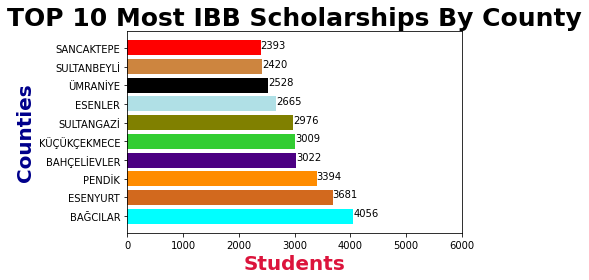

In [24]:
df5 = df4.nlargest(10, ['NUMBER_OF_STUDENTS'])
y_pos = np.arange(len(df5))
plt.barh(list(df5.index), df5['NUMBER_OF_STUDENTS'].to_numpy(), color = color_list[::-1])
plt.xticks(np.arange(0, 7000, 1000)) 
plt.xlabel('Students', fontweight='bold', color = 'crimson', fontsize='20')
plt.ylabel('Counties', fontweight='bold', color = 'darkblue', fontsize='20')
plt.title('TOP 10 Most IBB Scholarships By County', fontweight='bold', color = 'black', fontsize='25')
for index, value in enumerate(df5['NUMBER_OF_STUDENTS'].to_numpy()):
    plt.text(value, index, str(value))
plt.subplots_adjust(bottom=0.5, top=1.2)
plt.show()